In [1]:
import selenium
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

In [2]:
from bs4 import BeautifulSoup 
import time
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import re

In [4]:
driver = webdriver.Chrome(executable_path= 'C:/Users/vs889/Downloads/chromedriver_win32/chromedriver')
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="85366e9f95ae24474da3934ebaa2112f")>

## Log in 

In [5]:
driver.get("https://www.instagram.com/")

In [7]:
time.sleep(5)
username = driver.find_element_by_name("username")
username.send_keys("_.oobermensch")

In [8]:
password = driver.find_element_by_name("password")
password.send_keys("ved@2611")

In [9]:
login_btn = driver.find_element_by_xpath('//button[contains(@class,"_acan")]')  ##Log in button
login_btn.submit()  #click on log in btn

In [11]:
not_now = driver.find_element_by_xpath('//button[contains(@class,"_a9--")]')
not_now.click()  #click on not now to save info

In [10]:
nt_nw = driver.find_element_by_xpath('//button[contains(@class,"_acan")]')
nt_nw.click() #click on not now to turn notifications on

### From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [12]:
search_box = driver.find_element_by_class_name("_aauy")
search_box.send_keys("food")

In [16]:
results_food = []
base_url = "https://www.instagram.com/"
res = driver.find_elements_by_xpath('//div[contains(@class,"qyrsm KV-D4")]')
for i in res:
    if '#' not in i.get_attribute('innerHTML'):
        results_food.append(i.get_attribute('innerHTML'))
    if len(results_food)>10:
        break
links = []
for i in results_food:
    links.append(base_url+i)

In [18]:
driver.find_elements_by_xpath('//div[contains(@class,"qyrsm KV-D4")]')

[]

In [49]:
result = {}
for i in links:
    driver.get(i)
    time.sleep(3)
    html = driver.find_element_by_xpath('//section[contains(@class,"wW3k-")]').get_attribute('innerHTML')
    data = BeautifulSoup(html,'html.parser')
    name = data.find('h2').string
    followers = int(data.find_all(class_="g47SY")[1]['title'].replace(",",''))
    result[name] = followers

In [60]:
result = dict(sorted(result.items(), key=lambda x: x[1], reverse=True))
cnt = 0
print("Top 5 FOOD BLOGGERS: ")
print()
for i in result:
    print(i,end=" ")
    print(result[i])
    cnt+=1
    if cnt >5:
        break

Top 5 FOOD BLOGGERS: 

yourfoodlab 1864497
foodfusionpk 1552557
foodie_incarnate 1085620
foodozers 306574
delhifoodwalks 158469
food 156800


In [63]:
food_list = []
for i in result:
    food_list.append(i)
food_list = food_list[:5]

### Now Find the number of posts these handles have done in the previous 3 days.

In [81]:
import datetime

In [133]:
count_posts = {}
curr_date = str(datetime.date.today())
for i in food_list:
    driver.get(base_url+i)
    index = 0
    while True:
        posts = driver.find_elements_by_class_name("_9AhH0")
        posts[index].click()
        index+=1
        time.sleep(2)
        data = BeautifulSoup(driver.find_element_by_tag_name('time').get_attribute('outerHTML'),'html.parser')
        post_date = data.find('time')['datetime'][:10]

        data2 = BeautifulSoup(driver.find_element_by_xpath('//section[contains(@class,"wW3k-")]').get_attribute('innerHTML'),'html.parser')
        name = data2.find('h2').string
        if (int(curr_date[-2:]) - int(post_date[-2:]))<=3:
            count_posts[name] = count_posts.get(name,0)+1
        else:
            break
        driver.get(base_url+i)


In [135]:
driver.get(base_url)

In [134]:
count_posts

{'yourfoodlab': 1,
 'foodfusionpk': 5,
 'foodie_incarnate': 6,
 'foodozers': 4,
 'delhifoodwalks': 8}

###  Depict this information using a suitable graph.

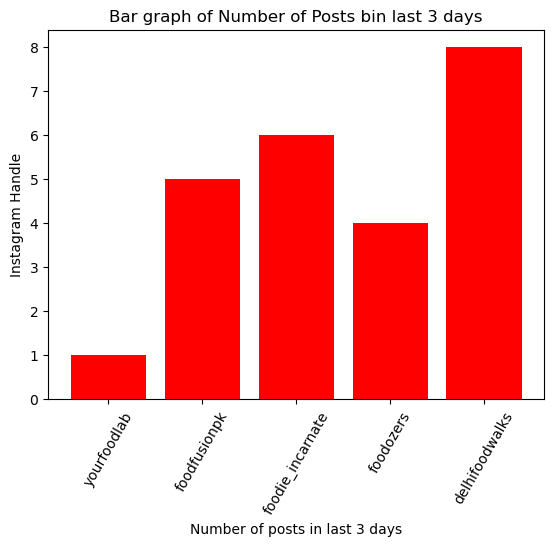

In [136]:
count_list = []
for i in count_posts:
    count_list.append(count_posts[i])
#graph
plt.bar(food_list, count_list, color = "red")
plt.xticks(rotation = 60)
plt.title("Bar graph of Number of Posts bin last 3 days")
plt.xlabel("Number of posts in last 3 days")
plt.ylabel("Instagram Handle")
plt.show()

### Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [164]:
for i in food_list:
    driver.get(base_url+i)
    driver.execute_script("window.scrollBy(0, 2000)")
    index = 0
    print(i)
    print("----------")
    while index<10:
        posts = driver.find_elements_by_class_name("_9AhH0")
        posts[index].click()
        time.sleep(3)
        html = driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span').get_attribute("outerHTML")
        data = BeautifulSoup(html,'html.parser')
        print(str(index+1)+". ", data.text)
        print("---------------------------------------------------------------------------------------------------------")
        index+=1
        driver.get(base_url+i)
    print()

yourfoodlab
----------
1.  Do you know what’s Paneer Patiyala? My Paneer Patiyala recipe out now on the YouTube channel! Check it out! Papad Paneer rolls served in a rich delicious restaurant style gravy! This recipe is really interesting & tastes super delicious. 🔥❤️....#recipe #paneer #paneerrecipe #paneerlove #paneerlover #paneerpatiala #streetfood #indianfood #foodporn #foodlover #foodgasm #foodstagram #sanjyotkeer #yourfoodlab #instagram
---------------------------------------------------------------------------------------------------------
2.  The Crispiest Onion Rings ever with 3 crazy delicious dips! The recipe is out now on my YouTube channel! 🔥 Check It out now! 😍❤️....#recipes #promo #onionrings #onionring #foodporn #foodlover #yourfoodlab #foodart #foodie #sanjyotkeer #easyrecipes #instafood #indianfood
---------------------------------------------------------------------------------------------------------
3.  Crispy Veggie Burger by Chef @sanjyotkeer ...Thank you for mak

6.  Andon ki Piyosi (Mithai) Recipe By Food FusionIt was very difficult for us to stop eating this. Unbelievably delicious recipe and a must try for all. Andon ki Piyosi (Mithai) #FoodFusion #HappyCookingToYou Written Recipe: https://bit.ly/3ov5R2G#InstaFood #Foodstagram #Foodfusion #HealthyFusion #Foodie #Cooking #DesiFood #Foodie #InstaFoodie #FoodPhotography #Recipe #foodgram #foodblogger #recipevideo #recipevideos #quickrecipes #eggdesserts #eggpudding #EggPyosi
---------------------------------------------------------------------------------------------------------
7.  Stuffed Cholay Kulchay Recipe By Food FusionA perfect street style stuffed Cholay Kulchay recipe perfect for any time. #HappyCookingToYou #FoodFusion #SunridgeFoodsWritten Recipe: https://bit.ly/3qaZG4J#InstaFood #Foodstagram #Foodfusion #HealthyFusion #Foodie #Cooking #DesiFood #Foodie #InstaFoodie #FoodPhotography #Recipe #foodgram #foodblogger #recipevideo #recipevideos #quickrecipes #Kulcha #Cholay #stuffedkulch

2.  Chicken Manchuria 😍#foodozers #chennaistreetfood #chennai
---------------------------------------------------------------------------------------------------------
3.  🔥TAG A BIRYANI LOVER HERE😆🥳The above featured bucket biryani is from @mirchi_express for the price of ₹1599 they serve some super tasty mutton biryani for 7-8 people. Definitely a bang for buck combo do check them out.  😍😍10% Off on pre orders 🔥🔥🔥💣Chicken for ₹1299 and mutton for ₹1599Contact no :: 9840611166order@mirchiexpress.in55/31 , Gandhi Irwin Road, Egmore, Chennai - 600008#foodozers #chennai #biryani #grilledchicken
---------------------------------------------------------------------------------------------------------
4.  YouTube sent us Gifts 🎁🥳😍🔥Thank you everyone for your supports@YouTubeCreatorsindia @YouTubelndia@telo_lenka @dey_preronaa #foodozers #chennai
---------------------------------------------------------------------------------------------------------
5.  Pizza 🍕 making eah oru Art athum anth

In [165]:
count_words = {}
for i in food_list:
    driver.get(base_url+i)
    driver.execute_script("window.scrollBy(0, 2000)")
    index = 0
    while index<10:
        posts = driver.find_elements_by_class_name("_9AhH0")
        posts[index].click()
        time.sleep(3)
        html = driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span').get_attribute("outerHTML")
        data = BeautifulSoup(html,'html.parser')
        data_text = str(data.text).split(" ") 
        for j in data_text:
            count_words[j] = count_words.get(j,0)+1
        index+=1
        driver.get(base_url+i)

for i in count_words:
    print(i, count_words[i])

Do 3
you 18
know 3
what’s 1
Paneer 4
Patiyala? 1
My 2
Patiyala 1
recipe 20
out 11
now 4
on 13
the 65
YouTube 12
channel! 4
Check 5
it 18
out! 2
Papad 1
rolls 3
served 1
in 28
a 18
rich 1
delicious 7
restaurant 3
style 3
gravy! 1
This 4
is 44
really 2
interesting 2
& 23
tastes 2
super 2
delicious. 1
🔥❤️....#recipe 1
#paneer 1
#paneerrecipe 1
#paneerlove 1
#paneerlover 1
#paneerpatiala 1
#streetfood 13
#indianfood 7
#foodporn 15
#foodlover 7
#foodgasm 6
#foodstagram 2
#sanjyotkeer 10
#yourfoodlab 5
#instagram 1
The 8
Crispiest 1
Onion 1
Rings 1
ever 1
with 16
3 1
crazy 1
dips! 1
my 10
🔥 1
It 5
now! 1
😍❤️....#recipes 1
#promo 3
#onionrings 1
#onionring 1
#foodart 1
#foodie 8
#easyrecipes 1
#instafood 2
Crispy 2
Veggie 2
Burger 1
by 4
Chef 2
@sanjyotkeer 2
...Thank 1
for 25
making 3
2021 1
memorable 2
year! 3
happens 1
to 34
be 6
last 5
of 33
year. 1
We 5
tried 3
our 10
best 3
deliver 1
some 5
recipes 1
this 23
year 4
and 31
we 7
hope 3
guys 6
are 4
proud 1
what 4
have 10
done. 1
2022 1
go

###  Create a csv file with two columns : the word and its frequency

In [166]:
list_of_words = [] 
for i in count_words:
    list_of_words.append([i, count_words[i]])
    
df = pd.DataFrame(list_of_words, columns = ["Word", "Frequency"]) #Making pandas to convert into csv file

In [167]:
df

,Word,Frequency
0,Do,3
1,you,18
2,know,3
3,what’s,1
4,Paneer,4
...,...,...
1027,#cholebhature,1
1028,#beststreetfood,1
1029,#streetfooddelhi,1
1030,#breakfastideas,1


In [168]:
df.to_csv("CSV_File_of_Words", index = False) #creating a csv file 
print("CSV file created")

CSV file created


### Now, find the hashtags that were most popular among these bloggers


In [171]:
food_hash_dict = {key: value for key, value in sorted(count_words.items(), key=lambda item: item[1], reverse = True)} #Sort the dict to get top 5 hashtags
list_of_hashtags = [] 
list_of_hastags_count = []

for i in food_hash_dict:
    if len(i)>0:
        if  i[0] == "#" and len(list_of_hashtags)<5:
            list_of_hashtags.append(i)
            list_of_hastags_count.append(count_words[i])
            print(i,"-", count_words[i])

#Foodie - 16
#foodblogger - 16
#foodporn - 15
#streetfood - 13
#foodgram - 13


### Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

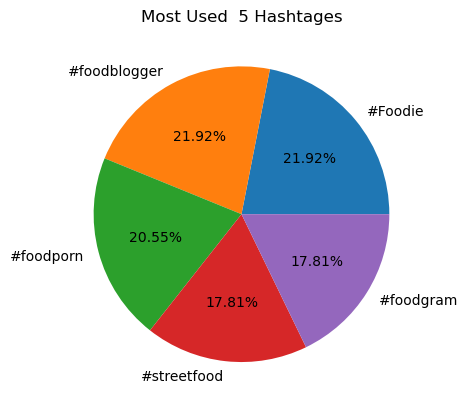

In [172]:
plt.pie(list_of_hastags_count, labels = list_of_hashtags, autopct = "%.2f%%") #Creating a Pie graph of hashtags
plt.title("Most Used  5 Hashtages")
plt.show()

### Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [ ]:
for i in food_list:
    driver.get(base_url+i)
    driver.execute_script("window.scrollBy(0, 2000)")
    index = 0
    print(i)
    print("----------")
    while index<10:
        posts = driver.find_elements_by_class_name("_9AhH0")
        posts[index].click()
        time.sleep(3)
        html = driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span').get_attribute("outerHTML")
        data = BeautifulSoup(html,'html.parser')
        print(str(index+1)+". ", data.text)
        print("---------------------------------------------------------------------------------------------------------")
        index+=1
        driver.get(base_url+i)
    print()

In [202]:
print("Like of first 10 posts!")
print()
posts_likes = {}
for i in food_list:
    driver.get(base_url+i)
    driver.execute_script("window.scrollBy(0, 2000)")
    index = 0
    likes_arr = []
    print(i)
    print("-------------")
    while index<10:
        posts = driver.find_elements_by_class_name("_9AhH0")
        posts[index].click()
        time.sleep(3)
        try:
            likes = int(driver.find_element_by_xpath('//div[contains(@class,"Nm9Fw")]/a/span').get_attribute("innerHTML").replace(',',''))
            likes_arr.append(likes)
            print("Likes of Posts "+str(index+1)+": ",likes)
            index+=1
        except NoSuchElementException:
            driver.find_element_by_xpath('//span[contains(@class,"vcOH2")]').click()
            likes = int(driver.find_element_by_xpath('//div[contains(@class,"vJRqr")]/span').get_attribute('innerHTML').replace(',',''))
            likes_arr.append(likes)
            print("Likes of Posts "+str(index+1)+": ",likes)
            index+=1
        
        driver.get(base_url+i)
    print("------------------------------------------------------")
    posts_likes[i] = likes_arr
print()

Like of first 10 posts!

yourfoodlab
-------------
Likes of Posts 1:  18538
Likes of Posts 2:  18688
Likes of Posts 3:  9000
Likes of Posts 4:  41256
Likes of Posts 5:  6596
Likes of Posts 6:  17872
Likes of Posts 7:  73313
Likes of Posts 8:  10832
Likes of Posts 9:  22506
Likes of Posts 10:  13913
------------------------------------------------------
foodfusionpk
-------------
Likes of Posts 1:  1656
Likes of Posts 2:  3493
Likes of Posts 3:  9931
Likes of Posts 4:  4204
Likes of Posts 5:  2206
Likes of Posts 6:  2529
Likes of Posts 7:  2614
Likes of Posts 8:  3863
Likes of Posts 9:  1400
Likes of Posts 10:  4351
------------------------------------------------------
foodie_incarnate
-------------
Likes of Posts 1:  8389
Likes of Posts 2:  52367
Likes of Posts 3:  12480
Likes of Posts 4:  17142
Likes of Posts 5:  127388
Likes of Posts 6:  21684
Likes of Posts 7:  17414
Likes of Posts 8:  44213
Likes of Posts 9:  19637
Likes of Posts 10:  26565
----------------------------------------

### Calculate the average likes for a handle

In [212]:
avg_likes = 0  
ratio_avg_like = {} 
for i in posts_likes:
    avg = sum(posts_likes[i])/10 
    print(i,"-",avg) 
    ratio_avg_like[i] = avg 

yourfoodlab - 23251.4
foodfusionpk - 3624.7
foodie_incarnate - 34727.9
foodozers - 19833.1
delhifoodwalks - 611.7


###  Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [220]:
list_ratio = [] 
for i in ratio_avg_like:
    ratio = ratio_avg_like[i]/result[i] 
    list_ratio.append(ratio)
    print("Ratio of likes to followers of last 10 post of", i,":" ,ratio) 

Ratio of likes to followers of last 10 post of yourfoodlab : 0.01247060199077821
Ratio of likes to followers of last 10 post of foodfusionpk : 0.002334664685418957
Ratio of likes to followers of last 10 post of foodie_incarnate : 0.031989001676461376
Ratio of likes to followers of last 10 post of foodozers : 0.06469270062040486
Ratio of likes to followers of last 10 post of delhifoodwalks : 0.0038600609582946825


### Create a bar graph to depict the above obtained information.

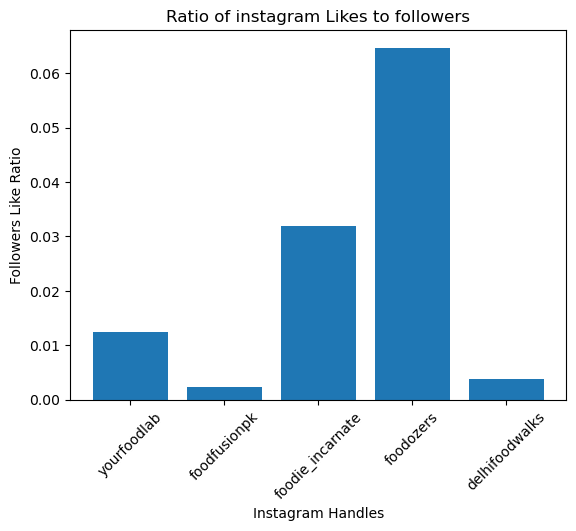

In [221]:
plt.bar(food_list, list_ratio)
plt.xticks(rotation = 45)
plt.title("Ratio of instagram Likes to followers")
plt.xlabel("Instagram Handles")
plt.ylabel("Followers Like Ratio")
plt.show()